In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
file=pd.read_csv("/content/finance_economics_dataset.csv")
file

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,Jan-01-2000,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,Jan-02-2000,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,Jan-03-2000,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,Jan-04-2000,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,Jan-05-2000,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Mar-14-2008,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,Mar-15-2008,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,Mar-16-2008,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,Mar-17-2008,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [ ]:
# 1. What percentage of the dataset shows negative GDP growth?
total_rows=len(file)
negative_GDP=(file["GDP Growth (%)"]<0).sum()
negative_percentage=(negative_GDP/total_rows)*100
print(f"The percentage of the dataset shows negative GDP growth is {negative_percentage:.2f}%")

The percentage of the dataset shows negative GDP growth is 31.57%


In [ ]:
# 2. Does high inflation correspond to higher interest rates?
d=file["Inflation Rate (%)"].corr(file["Interest Rate (%)"])
print(f"correlation:{d:.2f}")                                 #no realation because higher inflation does not nevessarily leeds to higher interest rate.

correlation:0.01


In [ ]:
# 3. Is there a relationship between unemployment and consumer spending?
i=file["Unemployment Rate (%)"].corr(file["Consumer Spending (Billion USD)"])
print(f"relationship between unemployment and consumer spending is:{i:.2f}")           # there is no significant relationship between unemployment and consumer spending.

relationship between unemployment and consumer spending is:0.02


In [ ]:
# 4. Do higher corporate profits align with higher consumer confidence?
j=file["Corporate Profits (Billion USD)"].corr(file["Consumer Confidence Index"])
print(f"relation:{j:.2f}")                     # higher corporate profit do not significantly algin with higher consumer confidence.

relation:0.02


/tmp/ipython-input-1407849740.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  monthly_data = file['Crude Oil Price (USD per Barrel)'].resample('Y').mean()


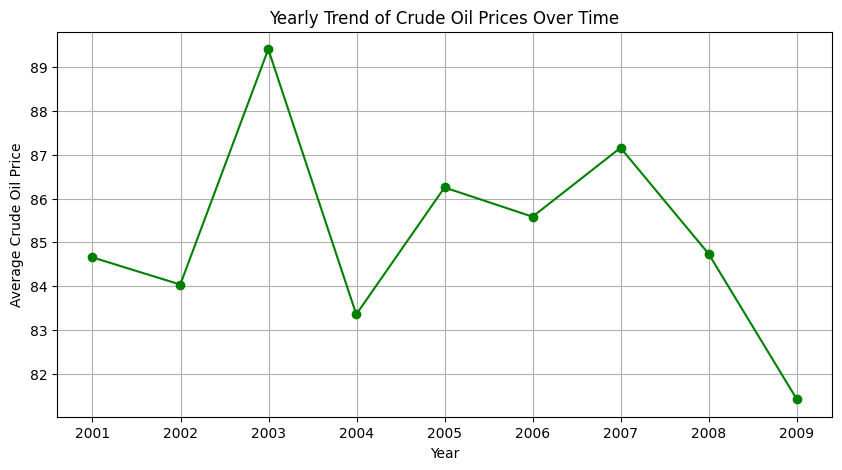

In [ ]:
# 5. What’s the trend of crude oil prices over time?
file['Date'] = pd.to_datetime(file['Date'])
file = file.set_index('Date')
monthly_data = file['Crude Oil Price (USD per Barrel)'].resample('Y').mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_data.index, monthly_data.values, color='green', marker='o')
plt.title('Yearly Trend of Crude Oil Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Crude Oil Price')
plt.grid(True)
plt.show()


In [ ]:
# 6. Are gold prices inversely related to stock performance?
file["stock_return"]=((file["Close Price"]-file["Open Price"])/file["Open Price"])*100
relation=file["Gold Price (USD per Ounce)"].corr(file["stock_return"])
print(f"relation:{relation:.2f}")

relation:-0.00


In [ ]:
# 7. Does government debt impact consumer confidence?
U=file["Government Debt (Billion USD)"].corr(file["Consumer Confidence Index"])
print(f"impact of government debt on consumer confidence is:{U:.2f}")      # no government debt does'nt impact consumer confidence

impact of government debt on consumer confidence is:-0.04


In [ ]:
# 8. How do mergers & acquisitions (M&A) activity correlate with stock index closing prices?
B=file["Mergers & Acquisitions Deals"].corr(file["Close Price"])
print(f"M&A activitiy with stock index closing prices is:{B:.2f}")
# mergers & acquisistions activity doesn't correlate with stock index closinng price because correlation value is (0.00).

M&A activitiy with stock index closing prices is:0.00


In [ ]:
# 9. Is retail sales growth associated with GDP growth?
V=file["Retail Sales (Billion USD)"].corr(file["GDP Growth (%)"])
print(f"relation:{V:.2f}")
# No, retail sales growth is not associated with GDP growth as it is no relation between two.

relation:-0.01


In [ ]:
# 10. Is stock market performance linked to consumer spending?
P=file["stock_return"].corr(file["Consumer Spending (Billion USD)"])
print(f"performance:{P:.2f}")
# NO, stock market performance is not linked to consumer spending as there 0.01 correlation between two.

performance:0.01


In [ ]:
# 11. Which stock index had the highest average closing price?
S=file.groupby("Stock Index")["Close Price"].mean()
j=S.idxmax()
y=S.max()
print(f"highest average closing price for {j}:{y:.2f}")

highest average closing price for Dow Jones:3004.46


In [ ]:
# 12. What is the relationship between interest rate and unemployment?
Q=file["Interest Rate (%)"].corr(file["Unemployment Rate (%)"])
print(f"relation::{Q:.2f}")
#observation:
#there is no relationship between interest rate and unemployment.

relation::0.02


In [ ]:
# 13. Do lower consumer confidence values coincide with higher bankruptcy rates?
correlation=file["Consumer Confidence Index"].corr(file["Bankruptcy Rate (%)"])
print(f"correlation:{correlation:.2f}")
# YES, lower consumer confidence values coincide with higher bankruptcy rates.

correlation:-0.02


In [ ]:
# 14. Which indicator has the highest correlation with stock close price?
correlation2=file.corr(numeric_only=True)["Close Price"].drop("Close Price").idxmax()
print(correlation2)

Daily High


In [ ]:
# 15. Are unemployment rates lower when corporate profits are high?
correlation1=file["Unemployment Rate (%)"].corr(file["Corporate Profits (Billion USD)"])
print(f"correlation:{correlation1:.2f}")
#Unemployment rates do not appear to be lower when corporate profits are high.

correlation:0.01
